# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time 
import urllib
from scipy.stats import linregress
import scipy.stats as st


from api_keys import api_key

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of lat and long
lat_range = (-90,90)
lng_range = (-180,180)

In [71]:
##Data Analsis - Three Observations

#1) Latitude vs Temperate Plot - This scatter plot shows that cities closest to the equator, or at 0 degrees, expereince the highest maximum temperatures. 
#2) Latitude vs Wind Speed - There appears to be no consistent correlation between wind speed and latitude. There is no consistent pattern based on the scatter plot. Most cities experience average wind speed around 10 mph. 
#3) Southern Hemisphere Humidity vs Latitude - This scatter plot shows there is a direct correlation and upward trend for humidity vs latitude.  Cities that are higher above the equator (higher in latitude) experience higher humidity. 

## Generate Cities List

In [3]:
# set up lists to hold reponse info
lat_lngs = []
cities = []


#create a set of random lat and long combos 
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1400)
lat_lngs = zip(lats,lngs)


# Loop through the list of cities and perform a request for data on each
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities: 
        cities.append(city)
        
len(cities)

552

In [4]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
settings = {"units": "imperial", "appid": api_key}
url = f"{url}appid={api_key}&units={units}"

In [5]:
url

'http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
# Create empty lists to append the API data to 
latitude = []
longitude = []
temp_max = []
humidity = []
cloud_coverage = []
wind_speed = []
city_name = []
country = []
datetime = []

# Start counter
record_counter = 1

#Print what curretly retrieving data for 
print(f"Start Data Retrieval Process")
print(f"-------------------------------")

#Loop through list of cities and append to empty lists 
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud_coverage.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        datetime.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {record_counter} | {city_record}")
        print(f"{url}&q={city}")
        
        record_counter= record_counter + 1        
        
    # Pass if city not found
    except:
        print("City not found")
    continue

Start Data Retrieval Process
-------------------------------
Processing Record 1 | Codrington
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=codrington
Processing Record 2 | Kinston
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=kinston
Processing Record 3 | Shemgang
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=shemgang
Processing Record 4 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=mataura
Processing Record 5 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=hithadhoo
Processing Record 6 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=bambous virieux
Processing Record 7 | Ashquelon
http://api.openweathermap.org/dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, lat, and temp
city_weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": temp_max,
    "Humidity": humidity,
    "Cloud coverage": cloud_coverage,
    "Wind Speed": wind_speed,
    "City datetime": datetime
}
#create a data frame from the dictionary 
city_weather_df = pd.DataFrame(city_weather_dict)

city_weather_df.count()


City               501
Country            501
Latitude           501
Longitude          501
Max Temperature    501
Humidity           501
Cloud coverage     501
Wind Speed         501
City datetime      501
dtype: int64

In [8]:
#a pandas dataframe is created and saved to a .csv from the data retrievied from the API 

city_weather_df.to_csv('city_weather_df.csv', encoding='utf-8', index=False)
city_weather_df


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloud coverage,Wind Speed,City datetime
0,Codrington,AU,-38.2667,141.9667,53.28,89,92,5.46,1617139429
1,Kinston,US,35.2627,-77.5816,75.20,43,40,5.75,1617139429
2,Shemgang,BT,27.2169,90.6579,48.07,70,49,4.47,1617139429
3,Mataura,NZ,-46.1927,168.8643,55.99,98,96,3.00,1617139430
4,Hithadhoo,MV,-0.6000,73.0833,83.41,75,76,18.05,1617139430
...,...,...,...,...,...,...,...,...,...
496,Östersund,SE,63.1792,14.6357,35.60,69,20,16.11,1617139559
497,Paso de Carrasco,UY,-34.8603,-56.0522,70.00,60,40,10.36,1617139560
498,Minbu,MM,20.1833,94.8833,77.02,55,6,4.47,1617139560
499,Châtellerault,FR,46.8000,0.5333,60.80,44,0,3.44,1617139560


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity= city_weather_df["Humidity"].max()
humidity

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

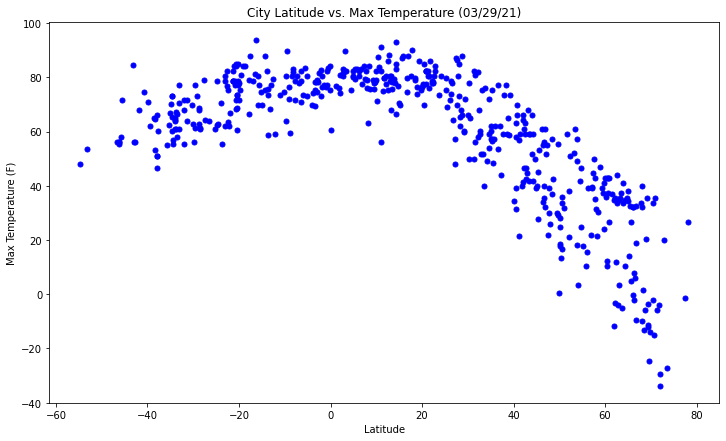

In [10]:
city_weather_df.plot.scatter(x="Latitude", y= "Max Temperature",s=25, color = "blue", figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (03/29/21)')
plt.savefig("../WeatherPy/Weather_Images/Latitude_Temperature.png")

## Latitude vs. Humidity Plot

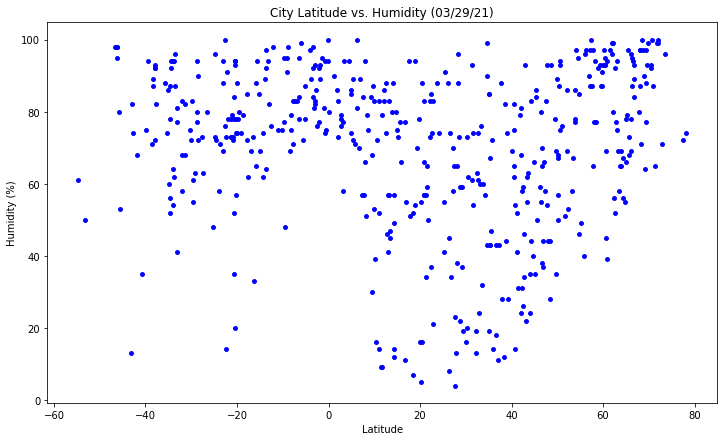

In [11]:
city_weather_df.plot.scatter(x="Latitude", y= "Humidity",s=15, color = "blue",figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (03/29/21)')
plt.savefig("../WeatherPy/Weather_Images/Latitude_Humidity.png")


## Latitude vs. Cloudiness Plot

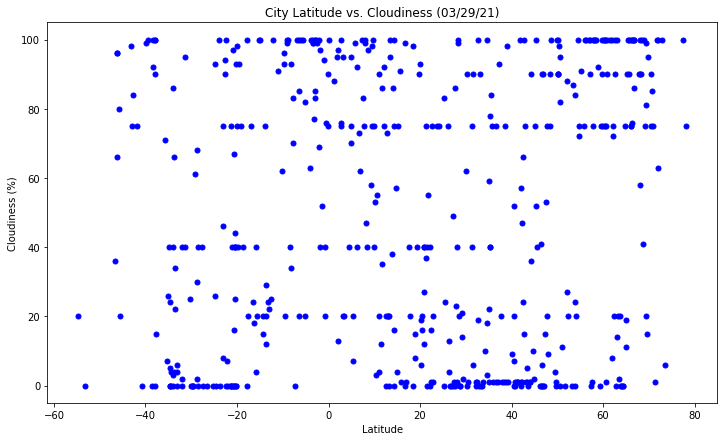

In [12]:
city_weather_df.plot.scatter(x="Latitude", y= "Cloud coverage",s=25, color = "blue",figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (03/29/21)')
plt.savefig("../WeatherPy/Weather_Images/Latitude_Cloudiness.png");

## Latitude vs. Wind Speed Plot

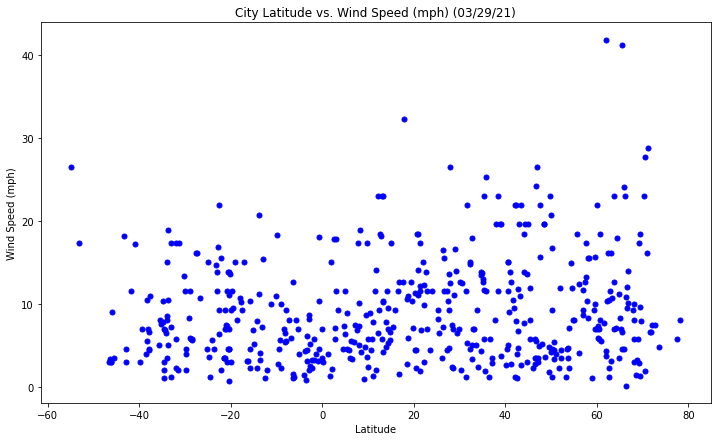

In [13]:
city_weather_df.plot.scatter(x="Latitude", y= "Wind Speed", marker = 'o',s=25, color = "blue",figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph) (03/29/21)')
plt.savefig("../WeatherPy/Weather_Images/Latitude_Wind Speed.png");

In [54]:
hem=city_weather_df.sort_values(["Latitude"], ascending=True)
south = hem.head(168)
north = hem.tail(333)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

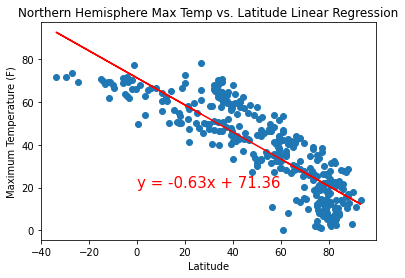

The correlation coefficient for the northern hemisphere between max temp and latitude is -0.86


<Figure size 432x288 with 0 Axes>

In [55]:
north_temp = north.iloc[:,4]
lat_plot = north.iloc[:,2]
correlation = st.pearsonr(north_temp,lat_plot)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_temp, lat_plot)
regress_values = north_temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_temp,lat_plot)
plt.plot(north_temp,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title("Northern Hemisphere Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../WeatherPy/Weather_Images/North_Temperature.png")

print(f"The correlation coefficient for the northern hemisphere between max temp and latitude is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

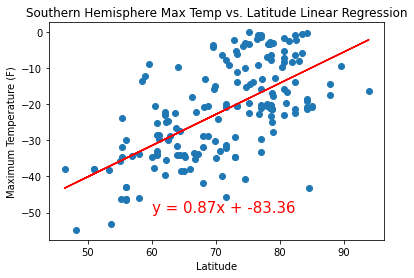

The correlation coefficient for the southern hempisphere between max temp and latitude is 0.63


<Figure size 432x288 with 0 Axes>

In [56]:
south_temp = south.iloc[:,4]
lat_plot = south.iloc[:,2]
correlation = st.pearsonr(south_temp,lat_plot)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_temp, lat_plot)
regress_values = south_temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_temp,lat_plot)
plt.plot(south_temp,regress_values,"r-")
plt.annotate(line_eq,(60,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title("Southern Hemisphere Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../WeatherPy/Weather_Images/South_Temperature.png")


print(f"The correlation coefficient for the southern hempisphere between max temp and latitude is {round(correlation[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

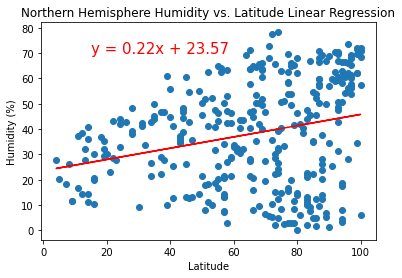

The correlation coefficient for the northern hemisphere between humidity and latitude is 0.26


<Figure size 432x288 with 0 Axes>

In [57]:
north_humidity = north.iloc[:,5]
lat_plot = north.iloc[:,2]
correlation = st.pearsonr(north_humidity,lat_plot)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_humidity, lat_plot)
regress_values = north_humidity * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_humidity,lat_plot)
plt.plot(north_humidity,regress_values,"r-")
plt.annotate(line_eq,(15,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../WeatherPy/Weather_Images/North_Humidity.png")

print(f"The correlation coefficient for the northern hemisphere between humidity and latitude is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

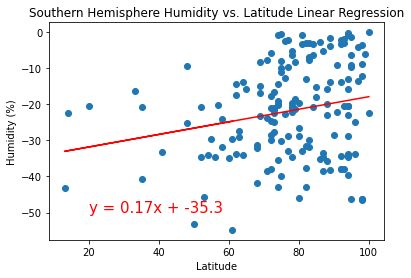

The correlation coefficient for the southern hemisphere between humidity and latitude is 0.22


<Figure size 432x288 with 0 Axes>

In [58]:
south_humidity = south.iloc[:,5]
lat_plot = south.iloc[:,2]
correlation = st.pearsonr(south_humidity,lat_plot)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_humidity, lat_plot)
regress_values = south_humidity * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_humidity,lat_plot)
plt.plot(south_humidity,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../WeatherPy/Weather_Images/South_Humidity.png")


print(f"The correlation coefficient for the southern hemisphere between humidity and latitude is {round(correlation[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

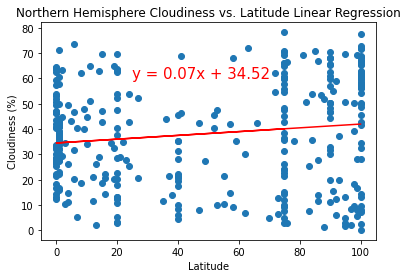

The correlation coefficient for the northern hemisphere between cloud coverage and latitude is 0.14


<Figure size 432x288 with 0 Axes>

In [59]:
north_cloud = north.iloc[:,6]
lat_plot = north.iloc[:,2]
correlation = st.pearsonr(north_cloud,lat_plot)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_cloud, lat_plot)
regress_values = north_cloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cloud,lat_plot)
plt.plot(north_cloud,regress_values,"r-")
plt.annotate(line_eq,(25,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../WeatherPy/Weather_Images/North_Cloud.png")


print(f"The correlation coefficient for the northern hemisphere between cloud coverage and latitude is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

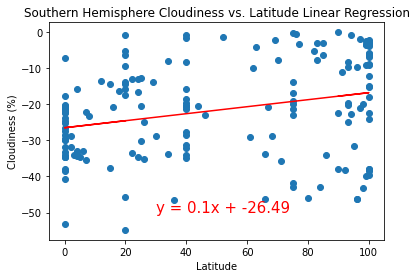

The correlation coefficient for the southern hemisphere between cloud coverage and latitude is 0.29


<Figure size 432x288 with 0 Axes>

In [60]:
south_cloud = south.iloc[:,6]
lat_plot = south.iloc[:,2]
correlation = st.pearsonr(south_cloud,lat_plot)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_cloud, lat_plot)
regress_values = south_cloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cloud,lat_plot)
plt.plot(south_cloud,regress_values,"r-")
plt.annotate(line_eq,(30,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../WeatherPy/Weather_Images/South_Cloud.png")


print(f"The correlation coefficient for the southern hemisphere between cloud coverage and latitude is {round(correlation[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

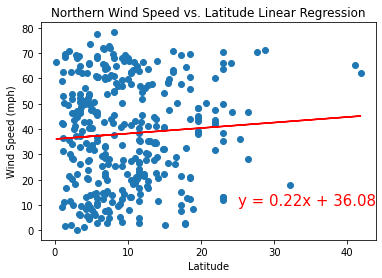

The correlation coefficient for the northern hemisphere between wind speed and latitude is 0.07


<Figure size 432x288 with 0 Axes>

In [61]:
north_wind = north.iloc[:,7]
lat_plot = north.iloc[:,2]
correlation = st.pearsonr(north_wind,lat_plot)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_wind, lat_plot)
regress_values = north_wind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_wind,lat_plot)
plt.plot(north_wind,regress_values,"r-")
plt.annotate(line_eq,(25,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Wind Speed vs. Latitude Linear Regression")
plt.show()
plt.savefig("../WeatherPy/Weather_Images/North_Wind.png")


print(f"The correlation coefficient for the northern hemisphere between wind speed and latitude is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

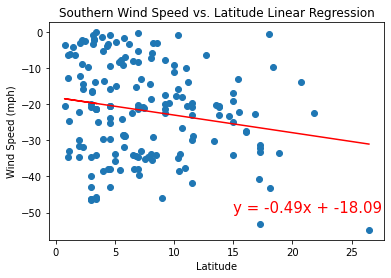

The correlation coefficient for the southern hemisphere between wind speed and latitude is -0.19


<Figure size 432x288 with 0 Axes>

In [62]:
south_wind = south.iloc[:,7]
lat_plot = south.iloc[:,2]
correlation = st.pearsonr(south_wind,lat_plot)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_wind, lat_plot)
regress_values = south_wind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_wind,lat_plot)
plt.plot(south_wind,regress_values,"r-")
plt.annotate(line_eq,(15,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Wind Speed vs. Latitude Linear Regression")
plt.show()
plt.savefig("../WeatherPy/Weather_Images/South_Wind.png")


print(f"The correlation coefficient for the southern hemisphere between wind speed and latitude is {round(correlation[0],2)}")